### **Majestic Million Domains - Dataset Cleaning**
This script is designed to process the **majestic_million.csv** dataset in order to generate a high-quality, representative subset of legitimate domain names. The resulting dataset can serve as a baseline for classification tasks or comparative analysis in supervised learning contexts.

---

### Objective
To extract a curated collection of 20,000 unique, valid, and top-level domains (TLDs) that reflect legitimate web activity. This subset forms a clean, reliable benchmark for evaluating cybersquatting detection models or other domain-based security analyses later on.

--- 

### Input and Output Details
- **Input file:** majestic_million.csv
- **Expected Header:** *(Insert header here)*
- **Input path:** *(Insert full path here)*

- **Output file CSV:** majestic_20k_domains.csv 
- **Output file JSONL:** majestic_20k_domains.jsonl
- **Output path:** *(Insert full path here)* 

---

### Processing Workflow
0. Start the domain purification process
1. Read the first 25.000 rows of the dataset, including the header row
2. Retain only the first 20,000 rows for downstream processing
3. Filter out entries where the TLD field is missing or empty
4. Remove duplicate entries in the Domain column to ensure uniqueness
5. Extract the full domain name from the "Domain" column
6. Format the cleaned data into the following structure: id, domain, classification
7. Label all data as "legit"
8. Ensure that the output directory exists
9. Successfully save the CSV file to the named output path
10. Successfully save the JSONL file to the named output path
11. Complete purification process

---

### Export
- Generate and export a CSV file for general use
- Generate and export a JSONL file for machine learning pipelines

---

### Logging
Print key metrics at each processing step:
- Number of rows read
- Number of domains retained after filtering
- Preview of sample entries

---

In [2]:
# First, ensure tldextract is installed. If not, run this in a separate cell:
import sys
!{sys.executable} -m pip install tldextract

In [3]:
import pandas as pd
import os
import json

# File Paths & Configuration 
input_file_path = '/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/raw_data/majestic_million.csv'
output_folder_path = '/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data'
output_file_name = 'majestic_20k_domains.csv'
output_file_path = os.path.join(output_folder_path, output_file_name)
ROWS_TO_READ = 25000
ROWS_TO_KEEP_INITIALLY = 20000

# Script 
print("0. Starting the domain purification process")

# Read the CSV file (first 25,000 rows)
try:
    df = pd.read_csv(input_file_path, nrows=ROWS_TO_READ)
    print(f"1. Sucessfully read {len(df)} rows including the header")
except FileNotFoundError:
    print(f"Error: The input file was not found at {input_file_path}")
    print("Please check the file path and try again.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    exit()

# Reduction to the first 20,000 domains 
if len(df) > ROWS_TO_KEEP_INITIALLY:
    df = df.head(ROWS_TO_KEEP_INITIALLY)
    print(f"2. Reduced dataset to the first {len(df)} domains")
else:
    print(f"Dataset already has {len(df)} domains or fewer, no initial reduction needed beyond the read limit")

# Only consider TLD domains 
# Assuming 'TLD' column should not be empty or NaN for valid TLDs
initial_domain_count_before_tld_filter = len(df)
df = df.dropna(subset=['TLD'])
df = df[df['TLD'].astype(str).str.strip() != ''] # Ensure TLD is not just whitespace
print(f"\n3. Filtering for TLD domains...")
print(f"   Domains before TLD filter: {initial_domain_count_before_tld_filter}")
print(f"   Domains after TLD filter: {len(df)}")

# Only consider unique domains
# Based on the 'Domain' column
initial_domain_count_before_uniqueness = len(df)
df = df.drop_duplicates(subset=['Domain'], keep='first')
print(f"\n4. Ensuring unique domains...")
print(f"   Domains before uniqueness filter: {initial_domain_count_before_uniqueness}")
print(f"   Domains after uniqueness filter: {len(df)}")

# Create the new DataFrame with specified labels 
print(f"\n5. Transforming data to the new format: id, domain, classification")
final_df = pd.DataFrame()
final_df['domain'] = df['Domain']
final_df['classification'] = 'legit'
final_df.reset_index(drop=True, inplace=True) # Remove old index
final_df.insert(0, 'id', final_df.index)      # Add new 'id' column starting from 0

print(f"\n6. Final dataset details:")
print(f"   Total legit domains prepared: {len(final_df)}")
if not final_df.empty:
    print("   Sample data (first 3 rows):")
    sample_output = final_df.head(3).to_string(index=False)
    indented_output = "\n".join("  " + line for line in sample_output.splitlines())
    print(indented_output)
else:
    print("The final dataset is empty after filtering")

# Create the output directory if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)
print(f"\n7. Ensured output directory exists: {output_folder_path}")

# Create new CSV file
try:
    final_df.to_csv(output_file_path, index=False)
    print(f"8. Successfully saved the purified data to: {output_file_path}")
except Exception as e:
    print(f"An error occurred while saving the output CSV file: {e}")

# Create new JSON file
jsonl_output_path = os.path.join(output_folder_path, 'majestic_20k_domains.jsonl')
try:
    with open(jsonl_output_path, 'w', encoding='utf-8') as f_jsonl:
        for _, row in final_df.iterrows():
            json_record = {
                "id": int(row["id"]),
                "domain": row["domain"],
                "classification": row["classification"]
            }
            f_jsonl.write(json.dumps(json_record) + "\n")
    print(f"9. Successfully saved JSONL output to: {jsonl_output_path}")
except Exception as e:
    print(f"An error occurred while saving the output JSONL file: {e}")


print("9. Purification process completed")

0. Starting the domain purification process
1. Sucessfully read 25000 rows including the header
2. Reduced dataset to the first 20000 domains

3. Filtering for TLD domains...
   Domains before TLD filter: 20000
   Domains after TLD filter: 20000

4. Ensuring unique domains...
   Domains before uniqueness filter: 20000
   Domains after uniqueness filter: 20000

5. Transforming data to the new format: id, domain, classification

6. Final dataset details:
   Total legit domains prepared: 20000
   Sample data (first 3 rows):
   id       domain classification
    0   google.com          legit
    1 facebook.com          legit
    2  youtube.com          legit

7. Ensured output directory exists: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data
8. Successfully saved the purified data to: /Users/johannesjacobschneider/Library/Mobile Documents

---

### **DGArchive (Fraunhofer) - Dataset Cleaning**
This script processes the **dgarchive.csv** dataset provided by the Fraunhofer Institute. The objective is to extract a representative and manageable subset of DGA-generated domains for analysis or training purposes in malicious domain detection models.

---

### Objective
To curate a high-quality dataset of 20,000 unique, malicious (DGA) domain names, preserving class distribution and meaningful variation across structural and algorithmic features. This subset facilitates robust training and evaluation of detection mechanisms for generated domain names.

--- 

### Input and Output Details
- **Input file:** dgarchive.csv
- **Expected Header:** *(Insert header here)*
- **Input path:** *(Insert full path here)*

- **Output file CSV:** dgarchive_20k_domains.csv 
- **Output file JSONL:** dgarchive_20k_domains.jsonl
- **Output file PNG:** dgarchive_20k_domains_distribution.png
- **Output path:** *(Insert full path here)* 

---

### Processing Workflow
0. Start the dga purification process
1. Read the entire dataset into memory
2. Reduce the dataset to 20,000 domains using stratified sampling based on class or DGA family labels to preserve proportional representation
4. Ensure the sampled dataset contains varying domains based on the most represented malware families across the CSVs
5. Extract the full domain name from the 'Domain' column
6. Format the cleaned data into the following structure: id, domain, family, classification
7. Label all data as "dga"
8. Ensure that the output directory exists
9. Successfully save the CSV file to the named output path
10. Successfully save the JSONL file to the named output path
11. Complete purification process

---

### Logging
Output key metrics for verification at various steps:
   - Total number of records
   - Number of unique domains
   - Class distribution before and after sampling
   - Domain length statistics
   - Entropy statistics

---

### Export
- Generate and export a CSV file for general use
- Generate and export a JSONL file for machine learning pipelines

---

In [5]:
# First, ensure pandas scikit-learn numpy is installed. If not, run this in a separate cell:
import sys
!{sys.executable} -m pip install pandas scikit-learn numpy

In [6]:
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import json

# File Paths & Configuration
input_folder = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/raw_data/2024-11-28-dgarchive_full"
output_dir = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data"
output_csv = os.path.join(output_dir, "dgarchive_20k_domains.csv")
output_jsonl = os.path.join(output_dir, "dgarchive_20k_domains.jsonl")
output_png = os.path.join(output_dir, "dgarchive_20k_domains_distribution.png")

domains_per_family = 2000
top_n_families = 10

# Script
print("0. Starting the domain purification process")

# Read all datasets
file_paths = glob(os.path.join(input_folder, "*_dga.csv"))

family_domain_counts = {}
all_data = []

for file_path in file_paths:
    family = os.path.basename(file_path).replace("_dga.csv", "")
    try:
        df = pd.read_csv(file_path, usecols=[0], names=["domain"], skiprows=1)
        df["malware_family"] = family
        family_domain_counts[family] = len(df)
        all_data.append(df)
        print(f"   Loaded {len(df)} domains from family: {family}")
    except Exception as e:
        print(f"   Error processing {file_path}: {e}")
print("1. Read the entire dataset into memory")


# Combine all CSVs
df_all = pd.concat(all_data, ignore_index=True)
print("2. Combined all datasets to one dataset")

# Select top-N most represented families
df_counts = pd.DataFrame.from_dict(family_domain_counts, orient='index', columns=['count'])
df_counts = df_counts.sort_values(by='count', ascending=False)
selected_families = df_counts.head(top_n_families).index.tolist()
df_top = df_all[df_all["malware_family"].isin(selected_families)]
print("3. Selected top-N most represented families")


# Establish new CSV structure
df_sampled = (
    df_top.groupby("malware_family")
    .apply(lambda x: x.sample(n=domains_per_family, random_state=42))
    .reset_index(drop=True)
)
df_sampled = df_sampled.rename(columns={"malware_family": "family"})
print("4. Established new CSV structure: id, domain, family, classification")

# Data labeling
df_sampled["classification"] = "dga"
df_sampled.insert(0, "id", range(len(df_sampled)))
print("5. Classified all data as 'dga'")

# Ensure that the output directory exists
def ensure_output_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"   Created output directory: {path}")
    else:
        print(f"   Output directory already exists: {path}")
ensure_output_dir(output_dir)
print("6. Ensured that the output directory exists")

# Save PNG
family_summary = df_sampled['family'].value_counts()
plt.figure(figsize=(10, 6))
family_summary.plot(kind="bar", color='#59c3b2', edgecolor="black")
plt.title("Final selected malware families (20,000 DGA domains)")
plt.ylabel("Number of domains")
plt.xlabel("Malware family")
plt.tight_layout()
plt.savefig(output_png)
plt.close()
print(f"\n7. Successfully saved PNG output to: {output_png}")

# Save CSV
df_sampled.to_csv(output_csv, index=False)
print(f"8. Successfully saved CSV output to: {output_csv}")

# --- NEU: Save distribution CSV ---
distribution_csv = os.path.join(output_dir, "dgarchive_20k_domains_distribution.csv")
family_summary_df = family_summary.rename_axis('family').reset_index(name='count')
family_summary_df.to_csv(distribution_csv, index=False)
print(f"8b. Successfully saved distribution CSV to: {distribution_csv}")

# Save JSONL
with open(output_jsonl, "w") as f:
    for _, row in df_sampled.iterrows():
        json.dump(row.to_dict(), f)
        f.write("\n")
print(f"9. Successfully saved JSONL output to: {output_jsonl}")

# Final step
print("10. Purification process complete")

0. Starting the domain purification process
   Loaded 2500 domains from family: ares
   Loaded 500 domains from family: enviserv
   Loaded 6573 domains from family: ekforward
   Loaded 232342 domains from family: oderoor
   Loaded 4757 domains from family: n3cr0m0rph
   Loaded 5 domains from family: randomloader
   Loaded 6000 domains from family: ramdo
   Loaded 50 domains from family: ud6
   Loaded 1938870 domains from family: locky
   Loaded 1431 domains from family: phorpiex
   Loaded 20 domains from family: omexo
   Loaded 12246 domains from family: sharkbot
   Loaded 364 domains from family: goznym
   Loaded 864 domains from family: madmax
   Loaded 348160 domains from family: sphinx
   Loaded 7822 domains from family: copperstealer
   Loaded 30000 domains from family: tinyfluff
   Loaded 26170 domains from family: diamondfox
   Loaded 2924 domains from family: ngioweb
   Loaded 292224 domains from family: tinynuke
   Loaded 24937446 domains from family: necurs
   Loaded 2111580 

/var/folders/z7/z2_p2pvs6ws66rfx7qbvfp480000gn/T/ipykernel_6116/1428483007.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=domains_per_family, random_state=42))


4. Established new CSV structure: id, domain, family, classification
5. Classified all data as 'dga'
   Output directory already exists: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data
6. Ensured that the output directory exists

7. Successfully saved PNG output to: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/dgarchive_20k_domains_distribution.png
8. Successfully saved CSV output to: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/dgarchive_20k_domains.csv
8b. Successfully saved distribution CSV to: /Users/johannesjacobschneider

---

### **Cybersquatting Variant Generation — Balanced Dataset**

This script systematically generates a diverse set of cybersquatting domain variants based on the **majestic_20k_domains.csv** dataset. The objective is to construct a balanced and high-quality dataset for research in phishing detection, domain abuse analysis, and machine learning training related to cybersquatting threats.

---

### Objective

To generate 20,000 unique, synthetically created cybersquatting domains using multiple transformation techniques applied to legitimate domains. Each entry is labeled with its generation strategy to support supervised classification and adversarial robustness evaluation.

---

### Input and Output Details
- **Input file**: majestic_20k_domains.csv  
- **Expected Header:** *(Insert header here)*
- **Input path:** *(Insert full path here)*

- **Output file CSV:** squatting_20k_domains_balanced.csv
- **Output file CSV:** squatting_20k_domains_balanced_distribution.csv
- **Output file JSONL:** squatting_20k_domains_unbalanced_distribution.jsonl
- **Output file PNG:** squatting_20k_domains_balanced_distribution.png
- **Output path:** *(Insert full path here)* 

---

### Processing Workflow
1. Import the list of legitimate domains from the CSV file
2. Remove any invalid, empty, or malformed domain entries

3. For each target domain, apply a range of transformation strategies to generate cybersquatting variants:
   1. Leetspeak substitutions: e.g., google.com → g00gle.com
   2. Typographic errors / letter swaps: e.g., paypal.com → payapl.com
   3. Missing char: e.g., netflix.com → netflx.com
   4. Extra char: e.g., google.com → gooogle.com
   4. Homoglyph replacements: e.g., using characters from other scripts like Cyrillic
   5. TLD swap: e.g., spotify.com → spotify.net
   6. Subdomain attack: e.g., secure.login.paypal.com
   7. Combo squatting: e.g., getpatreon.com, login-facebook.com
   8. Bitsquatting: e.g., based on single-bit errors in characters
   9. Keyword insertion: e.g., secure-amazon.com, update-ebay.com

4. Ensure that each squatting method contributes evenly to the final dataset
5. Avoid duplicates by tracking previously generated variants
6. Format the cleaned data into the following structure: id, target_domain, domain, classification, squat_type
7. Classify all data as "squat"
8. Ensure that the output directory exists
9. Successfully save the CSV file to the named output path
10. Successfully save the JSONL file to the named output path
11. Complete purification process

---

### Logging
Output key metrics for verification at various steps:
   - Total number of generated domains
   - Squatting method distribution (percentages)

---

### Export
- Generate and export a CSV file for general use
- Generate and export a CSV file for distribution overview
- Generate and export a JSONL file for machine learning pipelines
- Generate a PNG file for overview

---

In [7]:
# First, ensure pandas scikit-learn numpy is installed. If not, run this in a separate cell:
import sys
!{sys.executable} -m pip install matplotlib

0. Starting the cybersquatting generation process (balanced)
1. Sucessfully read 20000 rows including the header

2. Generating 20k balanced samples

3. Ensured output directory exists: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data
4. Successfully saved CSV output to: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/squatting_20k_domains_balanced.csv
5. Successfully saved the JSONL output to: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/squatting_20k_domains_balanced.jsonl

6. Data plot generated


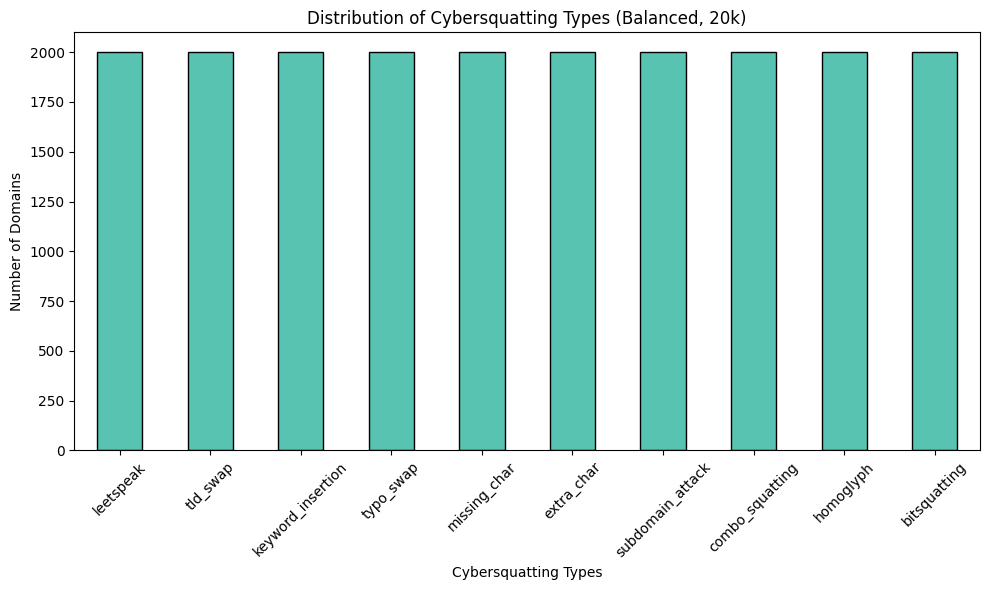

In [8]:
#balanced dataset
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

# File Paths & Configuration 
input_file = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/majestic_20k_domains.csv"
output_dir = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data"
output_csv = os.path.join(output_dir, "squatting_20k_domains_balanced.csv")
dist_csv = os.path.join(output_dir, "squatting_20k_domains_balanced_distribution.csv")
dist_png = os.path.join(output_dir, "squatting_20k_domains_balanced_distribution.png")

# Script 
print("0. Starting the cybersquatting generation process (balanced)")

# Mapping tables
leetspeak_map = {'a': ['4', '@'], 'e': ['3'], 'i': ['1', '!'], 'o': ['0'], 's': ['5', '$'], 'g': ['9'], 'l': ['1']}
homoglyph_map = {'a': ['а'], 'e': ['е'], 'i': ['і', 'í'], 'o': ['ο', 'о'], 'c': ['с'], 'd': ['ԁ'], 'p': ['р'], 'y': ['у'], 'h': ['һ'], 'm': ['rn']}
keywords = ['login', 'secure', 'verify', 'signin', 'update', 'support']
combos = ['bankof', 'my', 'get', 'try']
tlds = ['net', 'xyz', 'shop', 'info', 'online', 'click']
subdomains = ['login', 'secure', 'auth', 'mail', 'verify', 'account']

# Transformation functions
def apply_leetspeak(domain):
    return ''.join(random.choice(leetspeak_map.get(c.lower(), [c])) if c.lower() in leetspeak_map and random.random() < 0.4 else c for c in domain), "leetspeak"

def change_tld(domain):
    base = domain.split('.')[0]
    return base + '.' + random.choice(tlds), "tld_swap"

def insert_keyword(domain):
    base, tld = domain.rsplit('.', 1)
    return base + '-' + random.choice(keywords) + '.' + tld, "keyword_insertion"

def typo_swap(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    if len(base) < 2: return domain, "typo_swap"
    i = random.randint(0, len(base) - 2)
    swapped = list(base)
    swapped[i], swapped[i+1] = swapped[i+1], swapped[i]
    return ''.join(swapped) + tld, "typo_swap"

def missing_char(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    if len(base) < 2: return domain, "missing_char"
    i = random.randint(0, len(base) - 1)
    return base[:i] + base[i+1:] + tld, "missing_char"

def extra_char(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    i = random.randint(0, len(base))
    return base[:i] + random.choice('abcdefghijklmnopqrstuvwxyz') + base[i:] + tld, "extra_char"

def subdomain_attack(domain):
    base = domain.split('.')[0]
    return base + "." + random.choice(subdomains) + "-update.com", "subdomain_attack"

def combo_squatting(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    return random.choice(combos) + base + tld, "combo_squatting"

def apply_homoglyph(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    result = ''.join(random.choice(homoglyph_map[c.lower()]) if c.lower() in homoglyph_map and random.random() < 0.4 else c for c in base)
    return result + tld, "homoglyph"

def apply_bitsquatting(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    if not base: return domain, "bitsquatting"
    i = random.randint(0, len(base) - 1)
    bitflip = chr(ord(base[i]) ^ 1)
    return base[:i] + bitflip + base[i+1:] + tld, "bitsquatting"

methods = [
    apply_leetspeak,
    change_tld,
    insert_keyword,
    typo_swap,
    missing_char,
    extra_char,
    subdomain_attack,
    combo_squatting,
    apply_homoglyph,
    apply_bitsquatting
]

# Read the CSV file
df = pd.read_csv(input_file)
print(f"1. Sucessfully read {len(df)} rows including the header")
domains = df["domain"].dropna().unique().tolist()
generated, results = set(), []

samples_per_method = 2000
for func in methods:
    count = 0
    while count < samples_per_method:
        target = random.choice(domains)
        fake, mtype = func(target)
        if fake not in generated:
            generated.add(fake)
            results.append((len(results), target, fake, "squat", mtype))
            count += 1

print("\n2. Generating 20k balanced samples")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n3. Ensured output directory exists: {output_dir}")

# Export CSV
df_out = pd.DataFrame(results, columns=["id", "target_domain", "domain", "classification", "squat_type"])
df_out.to_csv(output_csv, index=False)
print(f"4. Successfully saved CSV output to: {output_csv}")
df_out['squat_type'].value_counts().to_csv(dist_csv)

# Export JSONL 
jsonl_path = os.path.join(output_dir, "squatting_20k_domains_balanced.jsonl")
with open(jsonl_path, 'w', encoding='utf-8') as f_jsonl:
    for _, row in df_out.iterrows():
        json_record = {
            "id": int(row["id"]),
            "target_domain": row["target_domain"],
            "domain": row["domain"],
            "classification": row["classification"],
            "squat_type": row["squat_type"]
        }
        f_jsonl.write(json.dumps(json_record) + "\n")
print(f"5. Successfully saved the JSONL output to: {jsonl_path}")

plt.figure(figsize=(10, 6))
df_out['squat_type'].value_counts().plot(kind="bar", color='#59c3b2', edgecolor="black")
plt.title("Distribution of Cybersquatting Types (Balanced, 20k)")
plt.ylabel("Number of Domains")
plt.xlabel("Cybersquatting Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(dist_png)
print("\n6. Data plot generated")

---

### **Cybersquatting Variant Generation — Realistic / Unbalanced Dataset**

This script generates a diverse set of cybersquatting domain variants from the **majestic_20k_domains.csv** dataset. Unlike the balanced version, this script emphasizes a realistic distribution of squatting techniques based on observations from phishing campaigns and domain abuse incidents.

---

### Objective

To synthesize 20,000 cybersquatting domains using a distribution that mimics real-world prevalence of attack methods. The dataset aims to reflect asymmetric technique usage patterns and is suited for training or evaluating detection systems in realistic conditions.

---

### Input and Output Details
- **Input file**: majestic_20k_domains.csv  
- **Expected Header:** *(Insert header here)*
- **Input path:** *(Insert full path here)*

- **Output file CSV:** squatting_20k_domains_unbalanced.csv
- **Output file CSV:** squatting_20k_domains_unbalanced_distribution.csv
- **Output file JSONL:** squatting_20k_domains_unbalanced_distribution.jsonl
- **Output file PNG:** squatting_20k_domains_unbalanced_distribution.png
- **Output path:** *(Insert full path here)* 

---

### Processing Workflow
1. Import the list of legitimate domains from the CSV file
2. Remove any invalid, empty, or malformed domain entries

3. For each target domain, apply a range of transformation strategies to generate cybersquatting variants:
   1. Leetspeak substitutions (10%): e.g., google.com → g00gle.com
   2. Typographic errors / letter swaps (30%): e.g., paypal.com → payapl.com
   3. Missing char (6%): e.g., netflix.com → netflx.com
   4. Extra char (5%): e.g., google.com → gooogle.com
   4. Homoglyph replacements (6%): e.g., using characters from other scripts like Cyrillic
   5. TLD swap (10%): e.g., spotify.com → spotify.net
   6. Subdomain attack (8%): e.g., secure.login.paypal.com
   7. Combo squatting (10%): e.g., getpatreon.com, login-facebook.com
   8. Bitsquatting (4%): e.g., based on single-bit errors in characters
   9. Keyword insertion (10%): e.g., secure-amazon.com, update-ebay.com

4. Ensure that each squatting method contributes evenly (stratified sampling) to the final dataset
5. Avoid duplicates by tracking previously generated variants
6. Format the cleaned data into the following structure: id, target_domain, domain, classification, squat_type
7. Classify all data as "squat"
8. Ensure that the output directory exists
9. Successfully save the CSV file to the named output path
10. Successfully save the JSONL file to the named output path
11. Complete purification process

---

### Logging
Output key metrics for verification at various steps:
   - Total number of generated domains
   - Squatting method distribution (percentages)

---

### Export
- Generate and export a CSV file for general use
- Generate and export a CSV file for distribution overview
- Generate and export a JSONL file for machine learning pipelines
- Generate a PNG file for overview

---

0. Starting the cybersquatting generation process (unbalanced)
1. Sucessfully read 20000 rows including the header

2. Generating 20k unbalanced samples

3. Ensured output directory exists: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data
4. Successfully saved the CSV output to: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/majestic_20k_domains.csv
5. Successfully saved the JSONL output to: /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/squatting_20k_domains_unbalanced.jsonl

6. Data plot generated


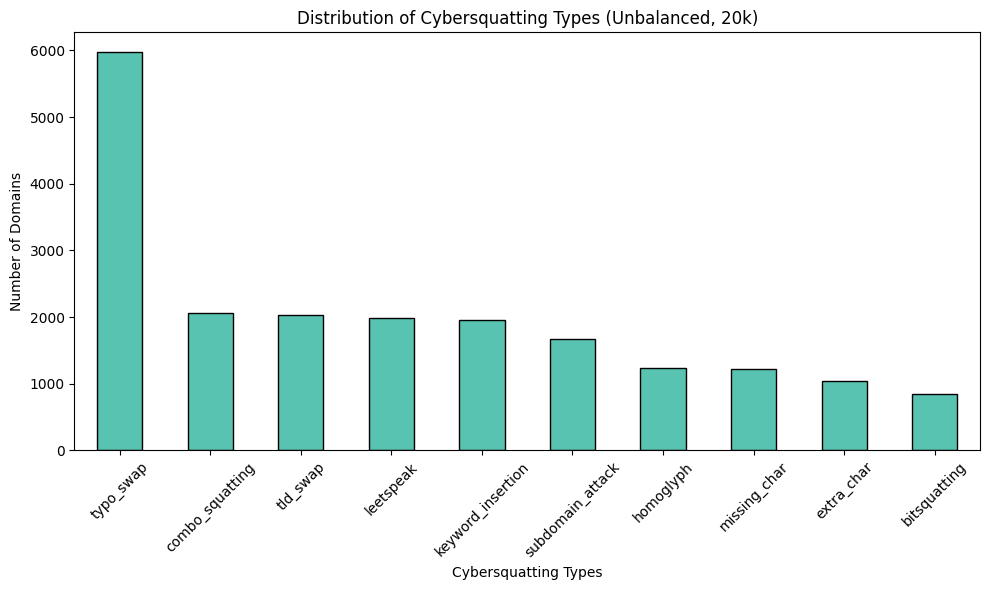

In [9]:
#unbalanced dataset
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
from collections import Counter

# File Paths & Confugration
input_file = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/majestic_20k_domains.csv"
output_dir = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data"
output_csv = os.path.join(output_dir, "squatting_20k_domains_unbalanced.csv")
dist_csv = os.path.join(output_dir, "squatting_20k_domains_unbalanced_distribution.csv")
dist_png = os.path.join(output_dir, "squatting_20k_domains_unbalanced_distribution.png")

# Script
print("0. Starting the cybersquatting generation process (unbalanced)")

# Mapping Tables
leetspeak_map = {'a': ['4', '@'], 'e': ['3'], 'i': ['1', '!'], 'o': ['0'], 's': ['5', '$'], 'g': ['9'], 'l': ['1']}
homoglyph_map = {'a': ['а'], 'e': ['е'], 'i': ['і', 'í'], 'o': ['ο', 'о'], 'c': ['с'], 'd': ['ԁ'], 'p': ['р'], 'y': ['у'], 'h': ['һ'], 'm': ['rn']}
keywords = ['login', 'secure', 'verify', 'signin', 'update', 'support']
combos = ['bankof', 'my', 'get', 'try']
tlds = ['net', 'xyz', 'shop', 'info', 'online', 'click']
subdomains = ['login', 'secure', 'auth', 'mail', 'verify', 'account']

# Transformation functions (same as in balanced version)
def apply_leetspeak(domain):
    return ''.join(random.choice(leetspeak_map.get(c.lower(), [c])) if c.lower() in leetspeak_map and random.random() < 0.4 else c for c in domain), "leetspeak"

def change_tld(domain):
    base = domain.split('.')[0]
    return base + '.' + random.choice(tlds), "tld_swap"

def insert_keyword(domain):
    base, tld = domain.rsplit('.', 1)
    return base + '-' + random.choice(keywords) + '.' + tld, "keyword_insertion"

def typo_swap(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    if len(base) < 2: return domain, "typo_swap"
    i = random.randint(0, len(base) - 2)
    swapped = list(base)
    swapped[i], swapped[i+1] = swapped[i+1], swapped[i]
    return ''.join(swapped) + tld, "typo_swap"

def missing_char(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    if len(base) < 2: return domain, "missing_char"
    i = random.randint(0, len(base) - 1)
    return base[:i] + base[i+1:] + tld, "missing_char"

def extra_char(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    i = random.randint(0, len(base))
    return base[:i] + random.choice('abcdefghijklmnopqrstuvwxyz') + base[i:] + tld, "extra_char"

def subdomain_attack(domain):
    base = domain.split('.')[0]
    return base + "." + random.choice(subdomains) + "-update.com", "subdomain_attack"

def combo_squatting(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    return random.choice(combos) + base + tld, "combo_squatting"

def apply_homoglyph(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    result = ''.join(random.choice(homoglyph_map[c.lower()]) if c.lower() in homoglyph_map and random.random() < 0.4 else c for c in base)
    return result + tld, "homoglyph"

def apply_bitsquatting(domain):
    base, tld = domain.split('.')[0], '.' + domain.split('.')[-1]
    if not base: return domain, "bitsquatting"
    i = random.randint(0, len(base) - 1)
    bitflip = chr(ord(base[i]) ^ 1)
    return base[:i] + bitflip + base[i+1:] + tld, "bitsquatting"

# Weighted list
methods = [
    (apply_leetspeak, 0.10),
    (change_tld, 0.10),
    (insert_keyword, 0.10),
    (typo_swap, 0.30),
    (missing_char, 0.06),
    (extra_char, 0.05),
    (subdomain_attack, 0.08),
    (combo_squatting, 0.10),
    (apply_homoglyph, 0.06),
    (apply_bitsquatting, 0.04),
]

# Read the CSV file
df = pd.read_csv(input_file)
print(f"1. Sucessfully read {len(df)} rows including the header")
domains = df["domain"].dropna().unique().tolist()
generated, results = set(), []
method_counter = Counter()

while len(generated) < 20_000:
    funcs, weights = zip(*methods)
    func = random.choices(funcs, weights=weights, k=1)[0]
    target = random.choice(domains)
    fake, mtype = func(target)
    if fake not in generated:
        generated.add(fake)
        results.append((len(results), target, fake, "squat", mtype))
        method_counter[mtype] += 1

print("\n2. Generating 20k unbalanced samples")

# Create the output directory if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)
print(f"\n3. Ensured output directory exists: {output_folder_path}")

# Exort CSV
df_out = pd.DataFrame(results, columns=["id", "target_domain", "domain", "classification", "squat_type"])
df_out.to_csv(output_csv, index=False)
print(f"4. Successfully saved the CSV output to: {output_file_path}")
pd.DataFrame.from_dict(method_counter, orient='index', columns=['count']).to_csv(dist_csv)

# Export JSONL 
jsonl_path = os.path.join(output_dir, "squatting_20k_domains_unbalanced.jsonl")
with open(jsonl_path, 'w', encoding='utf-8') as f_jsonl:
    for _, row in df_out.iterrows():
        json_record = {
            "id": int(row["id"]),
            "target_domain": row["target_domain"],
            "domain": row["domain"],
            "classification": row["classification"],
            "squat_type": row["squat_type"]
        }
        f_jsonl.write(json.dumps(json_record) + "\n")
print(f"5. Successfully saved the JSONL output to: {jsonl_path}")

plt.figure(figsize=(10, 6))
pd.Series(method_counter).sort_values(ascending=False).plot(kind="bar", color='#59c3b2', edgecolor="black")
plt.title("Distribution of Cybersquatting Types (Unbalanced, 20k)")
plt.ylabel("Number of Domains")
plt.xlabel("Cybersquatting Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(dist_png)
print("\n6. Data plot generated")

---

### **Dataset Fusion for LLM Finetuning**

This script merges multiple domain datasets—covering **legitimate**, **DGA-generated**, and **cybersquatted** domains—into a single, balanced dataset. The resulting dataset is optimized for fine-tuning large language models (LLMs) in the context of domain classification and threat detection.

---

### Objective

To generate a balanced and diverse dataset comprising 33,000 domain entries (10,000 per class: **legit**, **DGA**, **cybersquatting**) suitable for LLM fine-tuning. The final dataset is stratified and split into training, validation, and test sets (80/10/10), ensuring class balance across all subsets.

---

### Input and Output Details
**File 1**
- **Input file**: majestic_20k_domains.csv  
- **Expected Header:** id,domain,classification
- **Input path:** /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/majestic_20k_domains.csv

**File 2**
- **Input file**: squatting_20k_domains_balanced.csv
- **Expected Header:** id,target_domain,domain,classification,squat_type
- **Input path:** /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/squatting_20k_domains_balanced.csv

**File 3**
- **Input file**: synethized_dga_domains.csv
- **Expected Header:** domain, family
- **Input path:** /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/raw_data/synethized_dga_domains.csv

**Output**
- **Output file CSV:** dga_squatting_legit_data_balanced.csv
- **Output file JSONL:** dga_squatting_legit_data_balanced.jsonl
- **Output file CSV:** dga_squatting_legit_data_balanced_distribution.csv
- **Output file JSONL:** dga_squatting_legit_data_balanced_distribution.jsonl
- **Output file PNG:** dga_squatting_legit_data_balanced.png
- **Output path:** /Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data

---

### Processing Workflow
1. Load all input CSV files
2. Standardize column names and structure across datasets
3. Clean data:
   - Remove invalid, empty, or malformed domain entries
   - Remove duplicate entries across and within datasets
4. Normalize and relabel domain classes:
   - Legitimate (legit) = 0
   - DGA (dga) = 1
   - Cybersquatting (squat) = 2
5. Stratify and sample:
   - Select 10,000 domains per class, resulting in 30,000 total entries
   - Assign a uniform label schema and ensure consistency
6. Split dataset:
   - 80% for training (split = train)
   - 10% validation (split = val)
   - 10% test (split = test)
   - Maintain class balance across splits.
7. Format and export:
   - Add columns: id,domain,classification,split
8. Ensure output directory exists
9. Save all output files in CSV, JSONL, and PNG formats

---

### Logging
Output key metrics for verification at various steps:
    - Total number of input and final domain entries
    - Number of duplicates removed
    - Final distribution of each domain class
    - Distribution across splits (train, val, test)

---

### Export
- Generate and export a CSV file for general use
- Generate and export a CSV file for distribution overview
- Generate and export a JSONL file for machine learning pipelines
- Generate a PNG file for overview

---

In [18]:
import sys
!{sys.executable} -m pip install seaborn

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 1. Define input file paths
input_paths = {
    "legit": "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/majestic_20k_domains.csv",
    "squat": "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/squatting_20k_domains_balanced.csv",
    "dga": "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/dgarchive_20k_domains.csv"
}

# 2. Output directory and filenames
output_dir = "/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data"
os.makedirs(output_dir, exist_ok=True)

output_files = {
    "csv": os.path.join(output_dir, "dga_squatting_legit_data_balanced.csv"),
    "jsonl": os.path.join(output_dir, "dga_squatting_legit_data_balanced.jsonl"),
    "csv_dist": os.path.join(output_dir, "dga_squatting_legit_data_balanced_distribution.csv"),
    "jsonl_dist": os.path.join(output_dir, "dga_squatting_legit_data_balanced_distribution.jsonl"),
    "png": os.path.join(output_dir, "dga_squatting_legit_data_balanced.png")
}

# 3. Load and clean datasets
def load_and_clean():
    df_legit = pd.read_csv(input_paths["legit"])[['domain']].dropna().drop_duplicates()
    df_squat = pd.read_csv(input_paths["squat"])[['domain']].dropna().drop_duplicates()
    df_dga   = pd.read_csv(input_paths["dga"])[['domain']].dropna().drop_duplicates()

    df_legit['classification'] = 0
    df_dga['classification'] = 1
    df_squat['classification'] = 2

    return df_legit, df_squat, df_dga

# 4. Sample and combine
def sample_and_combine(df_legit, df_squat, df_dga, n=10000):
    df_legit = df_legit.sample(n=n, random_state=42)
    df_squat = df_squat.sample(n=n, random_state=42)
    df_dga   = df_dga.sample(n=n, random_state=42)
    df_combined = pd.concat([df_legit, df_squat, df_dga], ignore_index=True)
    return df_combined

# 5. Stratified split
# 5. Stratified split
def stratified_split(df):
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    split_dfs = []

    for class_label in sorted(df['classification'].unique()):
        df_class = df[df['classification'] == class_label].reset_index(drop=True)
        n = len(df_class)
        train_end = int(0.8 * n)
        val_end = int(0.9 * n)

        df_class.loc[:train_end - 1, 'split'] = 'train'
        df_class.loc[train_end:val_end - 1, 'split'] = 'val'
        df_class.loc[val_end:, 'split'] = 'test'

        split_dfs.append(df_class)

    df_split = pd.concat(split_dfs).reset_index(drop=True)
    df_split['id'] = range(len(df_split))  # ID von 0 bis 29999
    return df_split

# 6. Save files
def save_outputs(df):
    df = df[['id', 'domain', 'classification', 'split']]  # enforce column order

    # Save CSV
    df.to_csv(output_files["csv"], index=False)

    # Save JSONL
    with open(output_files["jsonl"], 'w') as f_jsonl:
        for _, row in df.iterrows():
            f_jsonl.write(json.dumps(row.to_dict()) + '\n')

    # Save distribution summary
    dist = df.groupby(['classification', 'split']).size().reset_index(name='count')
    dist.to_csv(output_files["csv_dist"], index=False)
    with open(output_files["jsonl_dist"], 'w') as f_jsonld:
        for _, row in dist.iterrows():
            f_jsonld.write(json.dumps(row.to_dict()) + '\n')

    # Save plot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='split', hue='classification')
    plt.title('Class Distribution by Split')
    plt.savefig(output_files["png"])
    plt.close()

# 7. Log info
def log_info(df):
    label_map = {0: 'legit', 1: 'dga', 2: 'squat'}
    
    print("1. Total number of domain entries:", len(df))
    
    # Class distribution
    print("\n2. Class distribution (0 = legit, 1 = dga, 2 = squat):")
    class_dist = df['classification'].value_counts().sort_index()
    class_df = pd.DataFrame({
        'classification': class_dist.index,
        'label': [label_map[c] for c in class_dist.index],
        'count': class_dist.values
    })
    print(class_df[['classification', 'count']].to_string(index=False))
    
    # Split distribution
    print("\n3. Distribution across splits:")
    split_dist = df.groupby(['classification', 'split']).size().unstack(fill_value=0).sort_index()
    print(split_dist)
    
    # Cumulative totals per split
    print("\n4. Cumulative totals per split (legit + dga + squat):")
    for split in ['train', 'val', 'test']:
        split_total = split_dist[split].sum()
        print(f"   {split}: {split_total} entries")
        
    # Sanity check
    total_by_splits = split_dist.sum().sum()
    total_entries = len(df)
    print(f"\n5. Sanity Check: {total_by_splits} total entries across splits (should be {total_entries})")
    assert total_by_splits == total_entries, "Sum of splits does not match total entries!"

# 8. Execute all
df_legit, df_squat, df_dga = load_and_clean()
df_combined = sample_and_combine(df_legit, df_squat, df_dga)
df_split = stratified_split(df_combined)
save_outputs(df_split)
log_info(df_split)

1. Total number of domain entries: 30000

2. Class distribution (0 = legit, 1 = dga, 2 = squat):
 classification  count
              0  10000
              1  10000
              2  10000

3. Distribution across splits:
split           test  train   val
classification                   
0               1000   8000  1000
1               1000   8000  1000
2               1000   8000  1000

4. Cumulative totals per split (legit + dga + squat):
   train: 24000 entries
   val: 3000 entries
   test: 3000 entries

5. Sanity Check: 30000 total entries across splits (should be 30000)


---

In [13]:
#Read in
df = pd.read_csv("/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/dga_squatting_legit_data_balanced.csv")

In [14]:
print(df['split'].value_counts().sort_index())

split
test      3000
train    24000
val       3000
Name: count, dtype: int64


In [15]:
print(pd.crosstab(df['split'], df['classification']))

classification     0     1     2
split                           
test            1000  1000  1000
train           8000  8000  8000
val             1000  1000  1000


In [16]:
print(df['classification'].value_counts().sort_index())

classification
0    10000
1    10000
2    10000
Name: count, dtype: int64


In [17]:
import pandas as pd

# Pfad zur CSV-Datei (anpassen!)
csv_path = '/Users/johannesjacobschneider/Library/Mobile Documents/com~apple~CloudDocs/johannesjacobschneider/FOM/2025_Sommersemester/Security_Analytics_Defense/Paper_Domain_Detection/Programing/Data/purified_data/dga_squatting_legit_data_balanced.csv'

# CSV einlesen
df = pd.read_csv(csv_path)

# Prüfen, ob die Spalte "domain" vorhanden ist
if 'domain' not in df.columns:
    raise ValueError("Die Spalte 'domain' wurde nicht in der CSV gefunden.")

# Längste Domain berechnen
df['domain_length'] = df['domain'].astype(str).apply(len)
max_length = df['domain_length'].max()
longest_domains = df[df['domain_length'] == max_length]['domain'].tolist()

# Ergebnisse ausgeben
print(f"Längste Domain-Länge: {max_length} Zeichen")
print("Domain(s) mit dieser Länge:")
for domain in longest_domains:
    print(domain)

Längste Domain-Länge: 43 Zeichen
Domain(s) mit dieser Länge:
termsandconditionsgenerator.auth-update.com
